#### Nifty-Stock Market Data

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd

from fbprophet import Prophet
from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

myfavouritenumber = 13
seed = myfavouritenumber
np.random.seed(seed)

In [123]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [73]:
from warnings import filterwarnings
filterwarnings('ignore')

#### Reading the market data of BAJAJFINSV stock and preparing a training dataset and validation dataset.

In [74]:
df = pd.read_csv("F:/Data Science projects/EDA/NIFTY-Stock market Data/BAJAJFINSV.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [75]:
df.set_index('Date',inplace=True)

#### Plotting the target variable VWAP over time

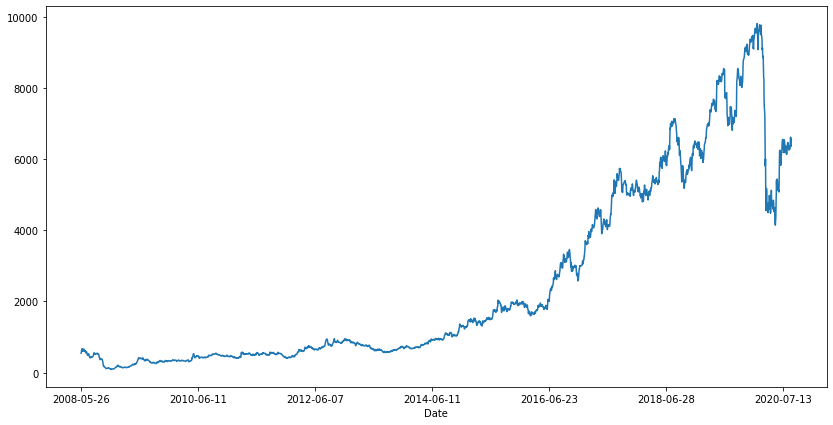

In [76]:
df['VWAP'].plot(figsize=(14, 7))

#### so u can observe here some kind of Seasonality

In [7]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [124]:
data=df.copy()

In [48]:
data.isna().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [125]:
data.dropna(inplace=True)

In [50]:
data.shape

(2291, 14)

In [51]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

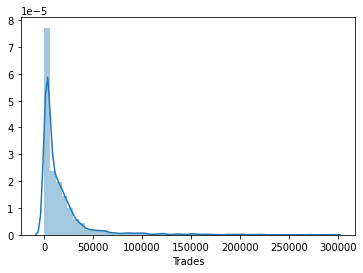

In [52]:
import seaborn as sns
sns.distplot(data['Trades'])

In [126]:
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7

In [127]:
for feature in lag_features:
    data[feature+'rolling_mean_3'] = data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7'] = data[feature].rolling(window=window2).mean()

In [128]:
for feature in lag_features:
    data[feature+'rolling_std_3'] = data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7'] = data[feature].rolling(window=window2).std()

In [129]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJAJFINSV,EQ,518.40,521.8,528.95,517.1,521.10,521.05,522.81,113360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJAJFINSV,EQ,521.05,518.8,519.85,504.0,514.95,512.45,513.71,62967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJAJFINSV,EQ,512.45,512.5,520.00,506.0,507.10,508.40,513.11,36445,...,5.211126,NaN,7.057148,NaN,39069.997351,NaN,2.064161e+12,NaN,1237.121255,NaN
2011-06-06,BAJAJFINSV,EQ,508.40,508.0,508.00,496.0,502.25,502.25,501.92,33537,...,6.885310,NaN,5.291503,NaN,16217.263682,NaN,8.469340e+11,NaN,551.246164,NaN
2011-06-07,BAJAJFINSV,EQ,502.25,503.0,552.00,503.0,546.50,545.50,536.79,1237385,...,22.744963,NaN,5.131601,NaN,694204.022264,NaN,3.732262e+13,NaN,20032.206344,NaN


In [83]:
data.shape

(2291, 34)

In [84]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [130]:
data.dropna(inplace=True)

In [131]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [132]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [110]:
data.shape

(2285, 44)

In [133]:
training_data=data[0:1800]
test_data=data[1800:]

In [134]:
training_data.shape

(1800, 34)

In [27]:
!pip install pmdarima

In [135]:
from pmdarima import auto_arima

In [136]:
training_data[ind_features].dtypes

Highrolling_mean_3        float64
Highrolling_mean_7        float64
Lowrolling_mean_3         float64
Lowrolling_mean_7         float64
Volumerolling_mean_3      float64
Volumerolling_mean_7      float64
Turnoverrolling_mean_3    float64
Turnoverrolling_mean_7    float64
Tradesrolling_mean_3      float64
Tradesrolling_mean_7      float64
Highrolling_std_3         float64
Highrolling_std_7         float64
Lowrolling_std_3          float64
Lowrolling_std_7          float64
Volumerolling_std_3       float64
Volumerolling_std_7       float64
Turnoverrolling_std_3     float64
Turnoverrolling_std_7     float64
Tradesrolling_std_3       float64
Tradesrolling_std_7       float64
dtype: object

### take somewhere 5 mins

In [144]:
model = auto_arima(y=training_data['VWAP'], exogenous=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=17180.287, Time=4.64 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17878.399, Time=2.58 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17495.745, Time=2.74 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17239.580, Time=3.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29569.396, Time=2.64 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=18192.160, Time=4.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=17218.123, Time=3.96 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=17371.732, Time=5.15 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=17165.559, Time=5.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=17164.369, Time=4.89 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=17208.282, Time=4.70 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=17166.364, Time=5.61 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=17277.387, Time=4.09 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=17204.826, Time=6.40 sec
 ARIMA(2,0,4)(0,0,0

In [145]:
model.fit(training_data['VWAP'], exogenous=training_data[ind_features])


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [146]:
test_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJAJFINSV,EQ,6347.45,6351.10,6479.20,6252.00,6362.00,6362.15,6393.90,358140,...,114.558271,131.705480,124.255419,121287.177191,103615.946112,7.642671e+13,6.657483e+13,11308.044496,11621.163994,6367.431996
2018-09-12,BAJAJFINSV,EQ,6362.15,6351.00,6474.00,6320.00,6413.90,6412.95,6403.48,193742,...,74.486703,37.898989,96.411159,84950.093127,103771.162197,5.421933e+13,6.707463e+13,5934.986633,11075.199936,6394.310134
2018-09-14,BAJAJFINSV,EQ,6412.95,6479.00,6799.00,6402.00,6775.00,6709.65,6609.93,265042,...,110.322486,75.108810,88.486246,82439.503080,80042.329734,5.247017e+13,5.096397e+13,6070.325966,7019.469306,6532.729661
2018-09-17,BAJAJFINSV,EQ,6709.65,6691.20,6699.95,6530.00,6540.15,6549.95,6595.67,165064,...,117.100280,105.836352,105.582067,51480.932017,81532.494680,3.474497e+13,5.176651e+13,5314.887989,7683.203846,6604.595870
2018-09-18,BAJAJFINSV,EQ,6549.95,6570.00,6635.60,6495.00,6520.00,6527.60,6551.14,222470,...,116.593785,66.153861,109.872220,50172.078065,77494.187158,3.322927e+13,4.918007e+13,7904.081245,8033.952902,6640.649672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJAJFINSV,EQ,6400.45,6439.95,6522.00,6401.00,6519.70,6502.60,6470.44,748345,...,75.450540,73.529320,64.557085,225260.535041,155093.908117,1.477920e+14,1.022106e+14,19538.021249,12867.578429,6429.643057
2020-08-26,BAJAJFINSV,EQ,6502.60,6535.00,6700.00,6520.75,6550.00,6564.40,6618.47,1001348,...,128.778116,113.336670,105.259424,209266.363289,248978.657341,1.454793e+14,1.679119e+14,18103.612632,20036.233914,6629.598678
2020-08-27,BAJAJFINSV,EQ,6564.40,6604.95,6604.95,6487.50,6535.95,6530.75,6540.01,461882,...,135.328871,61.816766,115.756302,269905.889010,248666.038849,1.803370e+14,1.670642e+14,21717.379492,20120.660099,6655.551617


In [147]:
forecast = model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [148]:
test_data["Forecast_ARIMA"] = forecast

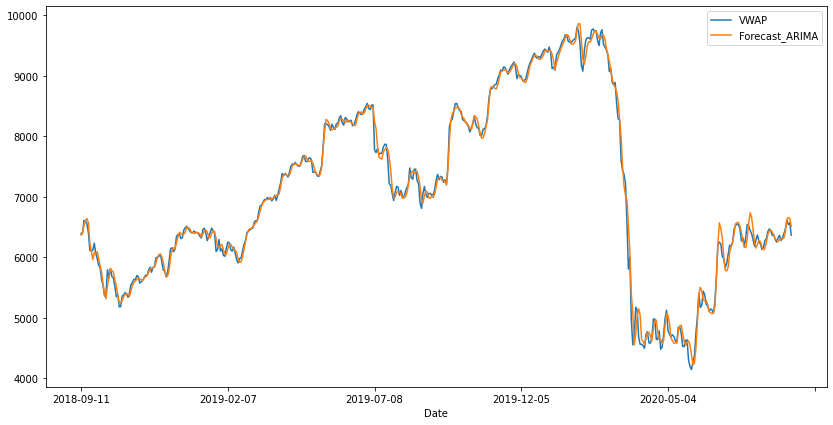

In [149]:
test_data[["VWAP", "Forecast_ARIMA"]].plot(figsize=(14, 7))

In [151]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(test_data.VWAP, test_data.Forecast_ARIMA)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(test_data.VWAP, test_data.Forecast_ARIMA))

RMSE of Auto ARIMAX: 120.19514865814408

MAE of Auto ARIMAX: 79.96094611533638


##### The Auto ARIMA model seems to do a fairly good job in predicting the stock price given data till the previous day. Can other models beat this benchmark?

In [ ]:
### mean, var, std--> gives worst prediction RMSE 1484, MAE 1228
### mean --> gives 122 RMSE, gives 82 MAE
### mean,std--> gives 120,79